In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
ds_data = pd.read_csv('ds_salaries.csv')

In [3]:
ds_data.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [4]:
ds_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [5]:
len(ds_data)

607

In [6]:
ds_data.describe()

,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,607.000000,6.070000e+02,607.000000,607.00000
mean,303.000000,2021.405272,3.240001e+05,112297.869852,70.92257
std,175.370085,0.692133,1.544357e+06,70957.259411,40.70913
min,0.000000,2020.000000,4.000000e+03,2859.000000,0.00000
25%,151.500000,2021.000000,7.000000e+04,62726.000000,50.00000
50%,303.000000,2022.000000,1.150000e+05,101570.000000,100.00000
75%,454.500000,2022.000000,1.650000e+05,150000.000000,100.00000
max,606.000000,2022.000000,3.040000e+07,600000.000000,100.00000


In [7]:
ds_data.isnull().sum()

Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
label = LabelEncoder()

In [10]:
ds_data['experience_level'] = label.fit_transform(ds_data['experience_level'])
ds_data['employment_type'] = label.fit_transform(ds_data['employment_type'])
ds_data['job_title'] = label.fit_transform(ds_data['job_title'])
ds_data['salary_currency'] = label.fit_transform(ds_data['salary_currency'])
ds_data['employee_residence'] = label.fit_transform(ds_data['employee_residence'])
ds_data['company_location'] = label.fit_transform(ds_data['company_location'])
ds_data['company_size'] = label.fit_transform(ds_data['company_size'])

In [11]:
ds_data.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,2,2,22,70000,7,79833,14,0,12,0
1,1,2020,3,2,41,260000,16,260000,32,0,29,2
2,2,2020,3,2,7,85000,8,109024,20,50,18,1
3,3,2020,2,2,47,20000,16,20000,23,0,20,2
4,4,2020,3,2,38,150000,16,150000,55,50,48,0


In [12]:
ds_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Unnamed: 0          607 non-null    int64
 1   work_year           607 non-null    int64
 2   experience_level    607 non-null    int32
 3   employment_type     607 non-null    int32
 4   job_title           607 non-null    int32
 5   salary              607 non-null    int64
 6   salary_currency     607 non-null    int32
 7   salary_in_usd       607 non-null    int64
 8   employee_residence  607 non-null    int32
 9   remote_ratio        607 non-null    int64
 10  company_location    607 non-null    int32
 11  company_size        607 non-null    int32
dtypes: int32(7), int64(5)
memory usage: 40.4 KB


<AxesSubplot:xlabel='experience_level', ylabel='salary'>

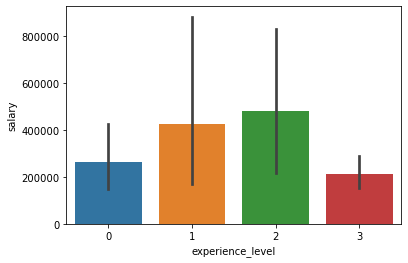

In [13]:
sns.barplot(x=ds_data['experience_level'],y=ds_data['salary'],data=ds_data)

<AxesSubplot:ylabel='count'>

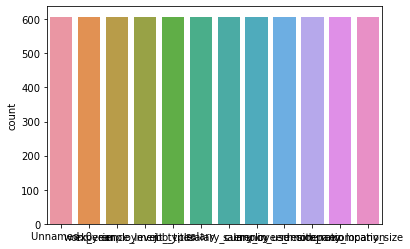

In [14]:
sns.countplot(data=ds_data)

<AxesSubplot:>

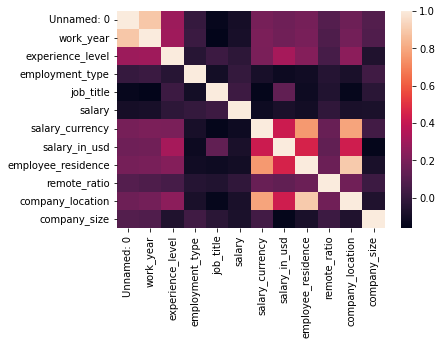

In [15]:
sns.heatmap(data=ds_data.corr())

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x = ds_data.drop('salary',axis=1)

In [18]:
y = ds_data['salary']

In [19]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.25,random_state=0)

In [20]:
len(x_train)

151

In [21]:
len(x_test)

456

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
log = LogisticRegression()

In [24]:
log.fit(x_train,y_train)

LogisticRegression()

In [25]:
log_score = log.score(x_test,y_test)
log_score

0.02850877192982456

In [26]:
from sklearn.naive_bayes import MultinomialNB

In [27]:
naive = MultinomialNB()

In [28]:
naive.fit(x_train,y_train)

MultinomialNB()

In [29]:
naive_score = naive.score(x_test,y_test)
naive_score

0.07675438596491228

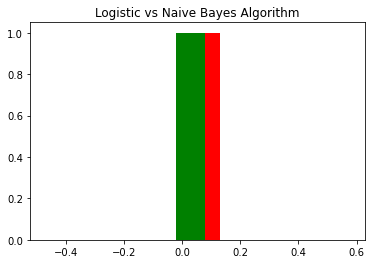

In [30]:
plt.hist(log_score,color='Red')
plt.hist(naive_score,color='Green')
plt.title('Logistic vs Naive Bayes Algorithm')
plt.show()